In [1]:
# get the helper functions
!wget https://raw.githubusercontent.com/Abhimanyu9539/Flask/main/helper_functions.py

--2024-01-22 14:13:29--  https://raw.githubusercontent.com/Abhimanyu9539/Flask/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-01-22 14:13:29 (18.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import helper function we are going to use in this notebook#
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Lets get some data

In [3]:
# Get 10% of the data of 10 classes
!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-01-22 14:13:34--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-01-22 14:13:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   228MB/s    in 0.7s    

2024-01-22 14:13:35 (228 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

FINISHED --2024-01-22 14:13:35--
Total wall clock time: 0.8s
Downloaded: 1 files, 161M in 0.7s (228 MB/s)


In [4]:
# Walkthrough the data
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [5]:
# Create training and testing directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [6]:
# Create data inputs
import tensorflow as tf

In [7]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = 32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = "categorical",
                                                                           batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
test_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
# Checkout class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

Takes the batches of data and shows it  
1 for 1 batch, 2 for two batches


```
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

```



### Model 0 - Building Transfer Learning Model using Functional API

In [10]:
# 1. Create the base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)

# 2. Freeze the base model layers so underlying pretrained model weights are not updated
base_model.trainable = False

# 3. Create inputs to our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = "input_layer")

# 4. If using ResNet50V2 you will need to normalise the inputs
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/ 255.)(inputs)

# 5. Pass the inputs to base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model {x.shape}")

# 6. Average pool the outputs of base model (aggregate the most important info, reduce the computation)
x = tf.keras.layers.GlobalAveragePooling2D(name = "Global_Average_Pooling")(x)
print(f"Shape after global average pooling2D : {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name = "output_layer")(x)

# 8. Combine the inputs with output
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        validation_data = test_data_10_percent,
                        # Go through less of the validation data so epochs are faster (we want faster experiments!)
                        validation_steps=int(0.25 * len(test_data_10_percent)),
                        epochs = 5,
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                 experiment_name = "Efficient Net Model 0")])

24274472/24274472 [==============================] - 0s 0us/step
Shape after passing inputs through base model (None, 7, 7, 1280)
Shape after global average pooling2D : (None, 1280)
Saving TensorBoard log files to: transfer_learning/Efficient Net Model 0/20240122-141352
Epoch 1/5
24/24 [==============================] - 21s 266ms/step - loss: 1.9077 - accuracy: 0.4320 - val_loss: 1.3440 - val_accuracy: 0.6990
Epoch 2/5
24/24 [==============================] - 3s 124ms/step - loss: 1.1675 - accuracy: 0.7400 - val_loss: 0.9486 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - 4s 174ms/step - loss: 0.8545 - accuracy: 0.8293 - val_loss: 0.7243 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 3s 121ms/step - loss: 0.6982 - accuracy: 0.8467 - val_loss: 0.6423 - val_accuracy: 0.8586
Epoch 5/5
24/24 [==============================] - 3s 121ms/step - loss: 0.5957 - accuracy: 0.8733 - val_loss: 0.6017 - val_accuracy: 0.8602


In [11]:
## Eavludate the model
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 76ms/step - loss: 0.5766 - accuracy: 0.8632


[0.5765865445137024, 0.8632000088691711]

In [12]:
# Check the layers in the model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [13]:
# Summary of base model
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [14]:
# Summary our model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 Global_Average_Pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


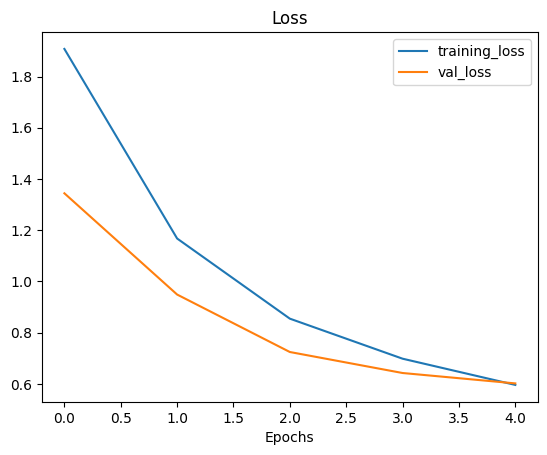

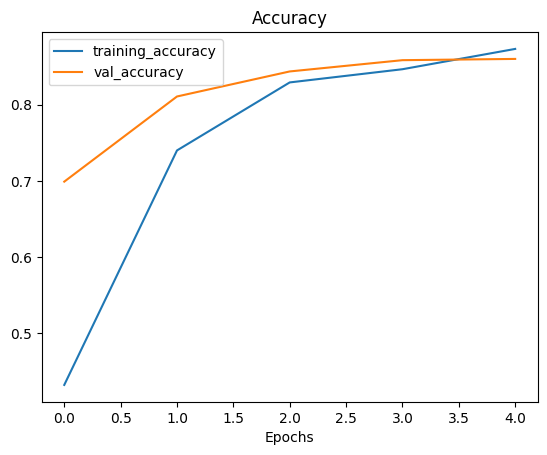

In [15]:
# Check out our model's training curves
plot_loss_curves(history_0)

## Getting a feature vector from a trained model

In [16]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Random tensor
import tensorflow as tf
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}")

# Pass the random tensor through GlobalAveragePooling2D
global_average_pooling_2d = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print()
print(f"2D Global Averge pooled input tensor:\n {global_average_pooling_2d}")

# Check the shape of different tensors
print(f"Shape of input tensor :\n {input_tensor.shape}")
print(f"Shape of Global Average 2D : \n {global_average_pooling_2d.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D Global Averge pooled input tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]
Shape of input tensor :
 (1, 4, 4, 3)
Shape of Global Average 2D : 
 (1, 3)


```
tensor = input_tensor[0, :, :, 0]

# Calculate the mean
sum_of_elements = tf.reduce_sum(tensor)
total_elements = tf.size(tensor)
mean_value = sum_of_elements / tf.cast(total_elements, dtype=tf.float32)

# Print the result
print("Mean:", mean_value.numpy())
```

In [17]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Random tensor
import tensorflow as tf
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}")

# Pass the random tensor through GlobalAveragePooling2D
global_average_pooling_2d = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print()
print(f"2D Global Averge pooled input tensor:\n {global_average_pooling_2d}")

# Check the shape of different tensors
print(f"Shape of input tensor :\n {input_tensor.shape}")
print(f"Shape of Global Average 2D : \n {global_average_pooling_2d.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D Global Averge pooled input tensor:
 [[0.9058464 1.1603122 1.6994323]]
Shape of input tensor :
 (1, 4, 4, 3)
Shape of Global Average 2D : 
 (1, 3)


# Running a series of transfer learning experiments

1. `Model 1`: Use feature extraction transfer learning on 1% of the training data with data augmentation.
2. `Model 2`: Use feature extraction transfer learning on 10% of the training data with data augmentation and save the results to a checkpoint.
3. `Model 3`: Fine-tune the Model 2 checkpoint on 10% of the training data with data augmentation.
4. `Model 4`: Fine-tune the Model 2 checkpoint on 100% of the training data with data augmentation.

#### Model 1

In [18]:
# download and unzip the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2024-01-22 14:14:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   237MB/s    in 0.5s    

2024-01-22 14:14:42 (237 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [19]:
# Create training and testing dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [20]:
# How many images we working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There a

##### set up data loader


In [21]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [22]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = image_dataset_from_directory(train_dir_1_percent,
                                                    image_size = IMG_SIZE,
                                                    label_mode = "categorical",
                                                    batch_size = BATCH_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         image_size = IMG_SIZE,
                                         batch_size = BATCH_SIZE,
                                         label_mode  = "categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
# adding data augmentation in to models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [24]:
# Create data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)

], name = "data_augmentation")

In [25]:
# Visualize the augmented data
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
print(target_dir)

random_image = random.choice(os.listdir(target_dir))
print(random_image)

random_image_path = target_dir +"/" + random_image
print(random_image_path)

10_food_classes_1_percent/train/pizza
2705497.jpg
10_food_classes_1_percent/train/pizza/2705497.jpg


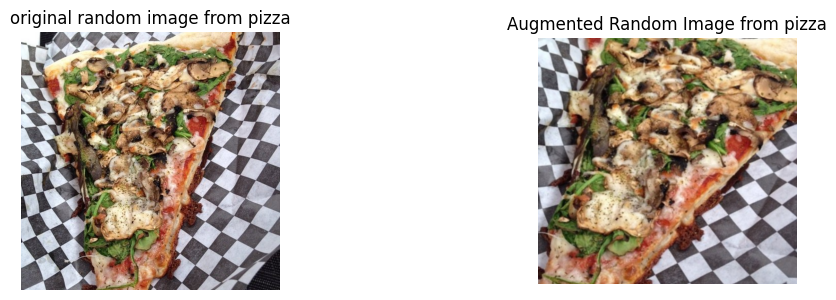

In [26]:
# Read in random image
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original random image from {target_class}")
plt.axis(False)

# Now lets plot augmented random image
augmented_image = data_augmentation(tf.expand_dims(img, axis=0), training=True)
plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(augmented_image)/255.0)
plt.axis(False)
plt.title(f"Augmented Random Image from {target_class}")
plt.subplots_adjust(wspace=1)  # You can adjust the value of wspace to control the horizontal space between subplots

plt.show()

##### Feature extraction transfer learning on 1% of the data with data augmentation

In [27]:
# Setup input shape, freezing the base model layers
input_shape = (224, 224, 3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layers
inputs = layers.Input(shape = input_shape, name = "input_layer")

# Add augmentation layers
x = data_augmentation(inputs)

# give base_model input after augmentation and dont train it
x = base_model(x, training=False)

# pool the outputs of base model
x = layers.GlobalAveragePooling2D(name = "global_average_pooling_2d")(x)

# Put a dense layer as  output
outputs = layers.Dense(10, activation = "softmax", name="output_layer")(x)

# Make the model using inputs and outputs
model_1 = keras.Model(inputs, outputs)

In [28]:
# Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [29]:
# Fit the model
history_1 = model_1.fit(train_data_1_percent,
                        validation_data = test_data,
                        validation_steps=int(0.25* len(test_data)), # validate for less steps
                        epochs = 5,
                        callbacks = [create_tensorboard_callback("transfer_learning", "1_percent_Efficient_Net")])

Saving TensorBoard log files to: transfer_learning/1_percent_Efficient_Net/20240122-141449
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.4097 - accuracy: 0.0571 - val_loss: 2.3079 - val_accuracy: 0.1069
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.2211 - accuracy: 0.1286 - val_loss: 2.2088 - val_accuracy: 0.1612
Epoch 3/5
3/3 [==============================] - 7s 2s/step - loss: 2.0150 - accuracy: 0.3714 - val_loss: 2.1072 - val_accuracy: 0.1974
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 1.8699 - accuracy: 0.5000 - val_loss: 2.0132 - val_accuracy: 0.2911
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.7441 - accuracy: 0.5429 - val_loss: 1.9387 - val_accuracy: 0.3569


In [30]:
# Check out model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_2d   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [31]:
# Evaluate on the test data
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 5s 64ms/step - loss: 1.9251 - accuracy: 0.3452


[1.9250800609588623, 0.3452000021934509]

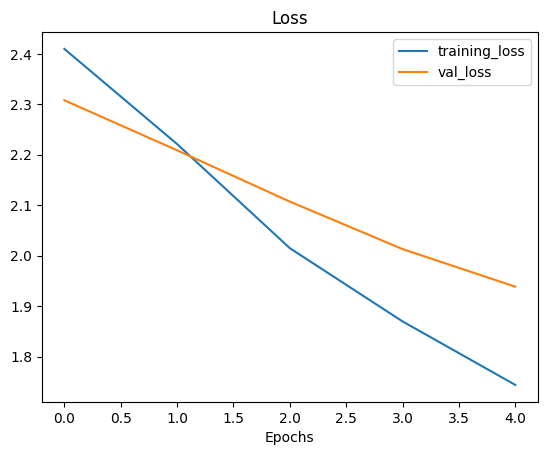

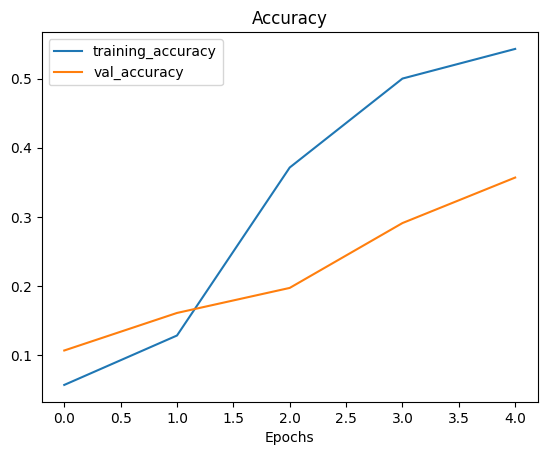

In [32]:
# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1)

#### Model 2: Feature extraction transfer learning with 10% of data and data augmentation

In [33]:
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
#unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [34]:
# Create dataloader
train_data_10_percent = image_dataset_from_directory(train_dir_10_percent,
                                                     image_size = IMG_SIZE,
                                                     label_mode = "categorical",
                                                     batch_size = BATCH_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         image_size = IMG_SIZE,
                                         label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [35]:
# Creating function model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [36]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name ="data_augmentation")


# Setup the input shape
input_shape = (224, 224, 3)

# Create the base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape = input_shape, name = "Input_layer")
x = data_augmentation(inputs) # Augment the training data
x = base_model(x, training = False) # Pass the augmented images but keep the base model in inference model, makes sure batch norm layers dont get updated
x = layers.GlobalAveragePooling2D(name = "Global_average_pooling_2d")(x)
outputs = layers.Dense(10, activation="softmax", name = "output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

##### Creating model checkpoint

In [37]:
# Set checkpoint path
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint"

# Create a model checkpoint which saves model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only=True,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [38]:
# fit the model saving checkpoints every epoch
initial_epoch = 5

history_2 = model_2.fit(train_data_10_percent,
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        epochs = initial_epoch,
                        callbacks = [create_tensorboard_callback("transfer_learning", "10_Efficient_net"), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_Efficient_net/20240122-141546
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0534 - accuracy: 0.3160
Epoch 1: val_loss improved from inf to 1.50888, saving model to ten_percent_model_checkpoint_weights/checkpoint
24/24 [==============================] - 36s 1s/step - loss: 2.0534 - accuracy: 0.3160 - val_loss: 1.5089 - val_accuracy: 0.6546
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3971 - accuracy: 0.6720
Epoch 2: val_loss improved from 1.50888 to 1.05771, saving model to ten_percent_model_checkpoint_weights/checkpoint
24/24 [==============================] - 24s 962ms/step - loss: 1.3971 - accuracy: 0.6720 - val_loss: 1.0577 - val_accuracy: 0.7549
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0884 - accuracy: 0.7333
Epoch 3: val_loss improved from 1.05771 to 0.83255, saving model to ten_percent_model_checkpoint_weights/checkpoint
24/24 [=========================

In [39]:
# Model 0 results
model_0.evaluate(test_data)

79/79 [==============================] - 6s 59ms/step - loss: 0.5766 - accuracy: 0.8632


[0.5765865445137024, 0.8632000088691711]

In [40]:
# Model 2 Results
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 68ms/step - loss: 0.6348 - accuracy: 0.8340


[0.6347544193267822, 0.8339999914169312]

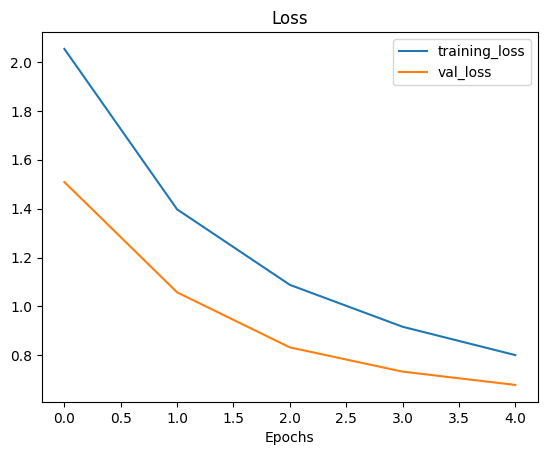

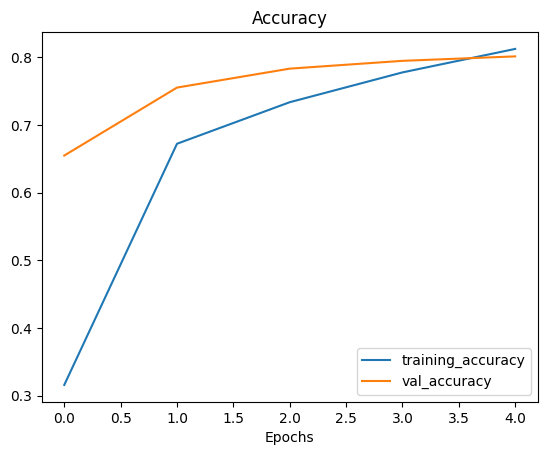

In [41]:
# Plot the model
plot_loss_curves(history_2)

##### Loading in checkpointed weights

In [42]:
# LOoad in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [43]:
# Evaluate model 2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 5s 59ms/step - loss: 0.6348 - accuracy: 0.8340


In [44]:
loaded_weights_model_results

[0.6347541809082031, 0.8339999914169312]

In [45]:
results_10_percent_data_aug

[0.6347544193267822, 0.8339999914169312]

In [46]:
# Check to see if two results are closer to each other
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))


array([ True,  True])

In [47]:
# Check the difference between two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[2.38418579e-07 0.00000000e+00]


### Model 3: Fine-tuning an existing model on 10% of the data

In [48]:
# Layers in model 2
model_2.layers

In [49]:
# Are the layers trainable
for layer in  model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e02caeb4070> True
<keras.src.engine.sequential.Sequential object at 0x7e02caeb48b0> True
<keras.src.engine.functional.Functional object at 0x7e02c16d52d0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7e02c162ab60> True
<keras.src.layers.core.dense.Dense object at 0x7e02cb0276d0> True


In [50]:
# how many trainable variable in base model
print(len(model_2.layers[2].trainable_variables))

0


In [51]:
# To begin fine tuning, lets start by setting last 10 layers of base-model as trainable
base_model.trainable = True

# freeze all layers except last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [52]:
# Recompile the model
model_2.compile(loss = "categorical_crossentropy",
                # when fine tuning you wanna reduce learning rate by 10X
                optimizer = tf.keras.optimizers.Adam(learning_rate =0.0001),
                metrics = ['accuracy'])


In [53]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 Global_average_pooling_2d   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [54]:
# Now wr have unfrozen some of the layers at the top
# how many trainable variable in base model
print(len(model_2.trainable_variables))

12


In [55]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epoch + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_2.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240122-141809
Epoch 5/10
24/24 [==============================] - 35s 1s/step - loss: 0.6991 - accuracy: 0.8080 - val_loss: 0.5241 - val_accuracy: 0.8257
Epoch 6/10
24/24 [==============================] - 25s 978ms/step - loss: 0.5950 - accuracy: 0.8240 - val_loss: 0.4975 - val_accuracy: 0.8240
Epoch 7/10
24/24 [==============================] - 18s 703ms/step - loss: 0.5019 - accuracy: 0.8587 - val_loss: 0.4798 - val_accuracy: 0.8273
Epoch 8/10
24/24 [==============================] - 17s 689ms/step - loss: 0.5055 - accuracy: 0.8480 - val_loss: 0.4705 - val_accuracy: 0.8306
Epoch 9/10
24/24 [==============================] - 16s 647ms/step - loss: 0.4841 - accuracy: 0.8480 - val_loss: 0.4350 - val_accuracy: 0.8454
Epoch 10/10
24/24 [==============================] - 15s 592ms/step - loss: 0.4580 - accuracy: 0.8453 - val_loss: 0.4726 - val_accuracy: 0.8306


In [56]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.4297 - accuracy: 0.8564


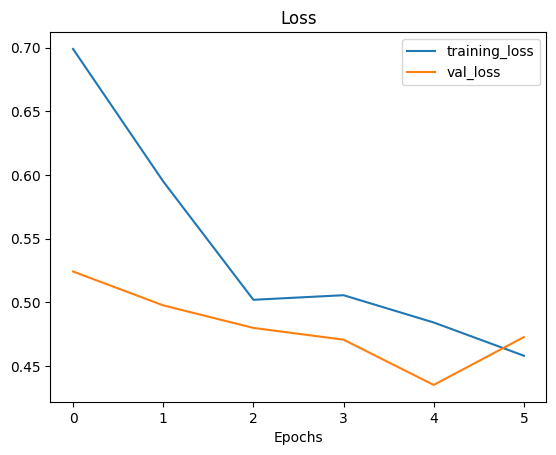

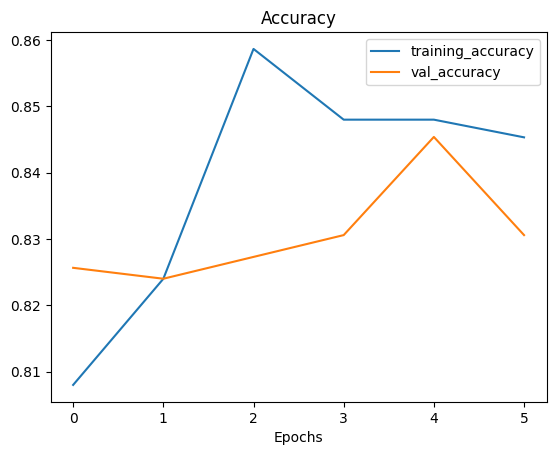

In [58]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [59]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3160000145435333, 0.671999990940094, 0.7333333492279053, 0.7773333191871643, 0.8119999766349792, 0.8080000281333923, 0.8240000009536743, 0.8586666584014893, 0.8479999899864197, 0.8479999899864197, 0.8453333377838135]


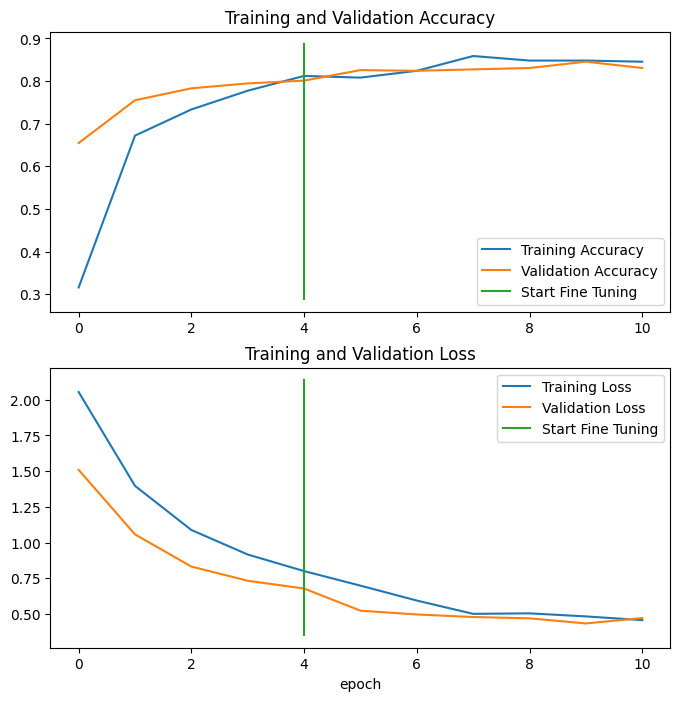

In [60]:
compare_historys(original_history=history_2,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

### Model 4: Fine-tuning an existing model all of the data

In [61]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-01-22 14:34:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   119MB/s    in 4.3s    

2024-01-22 14:34:19 (114 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [62]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [63]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [64]:
# Evaluate model (this is the fine-tuned 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 66ms/step - loss: 0.4297 - accuracy: 0.8564


[0.42973729968070984, 0.8564000129699707]

In [65]:
results_fine_tune_10_percent

[0.42973729968070984, 0.8564000129699707]

In [67]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
model_2 = create_base_model()


In [68]:
# Create a new instance of model_2 for Experiment 4
model_2 = create_base_model(learning_rate=0.0001) # 10x lower learning rate for fine-tunin

In [69]:
# Load previously checkpointed weights
model_2.load_weights(checkpoint_path)

In [70]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [71]:
print(len(model_2.trainable_variables))

2


In [72]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 8s 57ms/step - loss: 0.6348 - accuracy: 0.8340


[0.6347543001174927, 0.8339999914169312]

In [73]:

# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [74]:
# Unfreeze the top 10 layers in model_2's base_model
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

In [75]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [76]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [77]:
# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epoch + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_2.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20240122-143846
Epoch 5/10
235/235 [==============================] - 138s 547ms/step - loss: 0.6954 - accuracy: 0.7773 - val_loss: 0.3346 - val_accuracy: 0.9013
Epoch 6/10
235/235 [==============================] - 93s 392ms/step - loss: 0.5810 - accuracy: 0.8131 - val_loss: 0.3399 - val_accuracy: 0.8898
Epoch 7/10
235/235 [==============================] - 82s 344ms/step - loss: 0.5238 - accuracy: 0.8279 - val_loss: 0.2954 - val_accuracy: 0.9128
Epoch 8/10
235/235 [==============================] - 74s 316ms/step - loss: 0.4923 - accuracy: 0.8377 - val_loss: 0.2694 - val_accuracy: 0.9178
Epoch 9/10
235/235 [==============================] - 70s 298ms/step - loss: 0.4618 - accuracy: 0.8489 - val_loss: 0.2676 - val_accuracy: 0.9211
Epoch 10/10
235/235 [==============================] - 65s 274ms/step - loss: 0.4358 - accuracy: 0.8607 - val_loss: 0.2580 - val_accuracy: 0.9178


In [78]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data


79/79 [==============================] - 5s 59ms/step - loss: 0.2758 - accuracy: 0.9116


[0.2758089005947113, 0.9115999937057495]

In [79]:
results_fine_tune_10_percent

[0.42973729968070984, 0.8564000129699707]

5
11
[0.3160000145435333, 0.671999990940094, 0.7333333492279053, 0.7773333191871643, 0.8119999766349792, 0.7773333191871643, 0.8130666613578796, 0.8278666734695435, 0.8377333283424377, 0.8489333391189575, 0.8606666922569275]


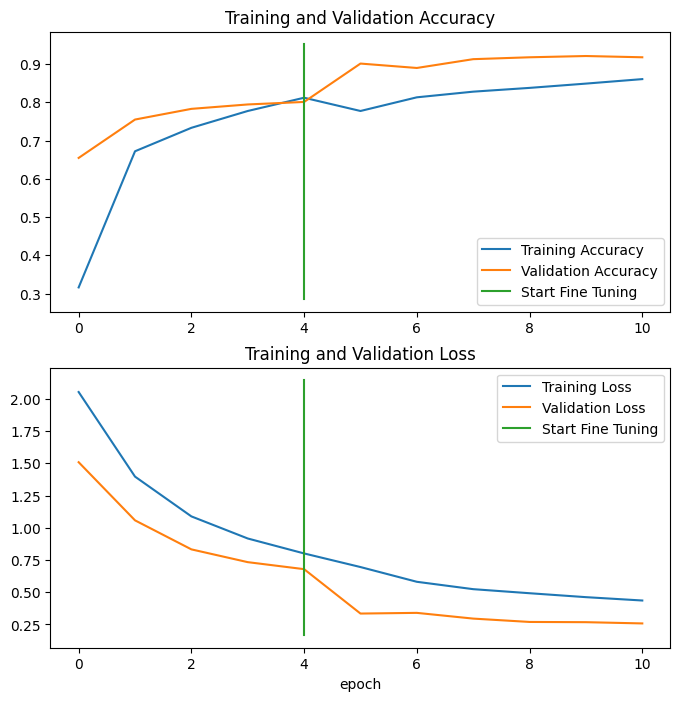

In [80]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_2,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)